In [16]:
import mplsoccer
import pandas as pd
import os
import sys  
import folium
from datetime import datetime
import json
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

sys.path.insert(1, '/02806-final-assingment/data')

In [11]:
df = pd.read_csv('../data/archive/events_England.csv')
teams = pd.read_csv('../data/archive/teams.csv')

In [10]:
df

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85.0,177959171,[1801],49,49,78,31
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83.0,177959172,[1801],78,31,75,51
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82.0,177959173,[1801],75,51,71,35
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82.0,177959174,[1801],71,35,95,41
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85.0,177959175,[1801],95,41,88,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643085,8,Smart pass,[{'id': 1801}],9194,"[{'y': 99, 'x': 41}, {'y': 69, 'x': 66}]",2500098,Pass,1623,2H,2614.478054,86.0,251596378,[1801],31,2,32,0
643086,8,Simple pass,[{'id': 1801}],145692,"[{'y': 69, 'x': 66}, {'y': 85, 'x': 64}]",2500098,Pass,1623,2H,2615.493725,85.0,251596379,[1801],32,0,100,100
643087,8,High pass,[{'id': 1801}],56,"[{'y': 85, 'x': 64}, {'y': 10, 'x': 69}]",2500098,Pass,1623,2H,2616.871291,83.0,251596380,[1801],100,100,47,88
643088,8,Simple pass,[{'id': 1801}],8239,"[{'y': 10, 'x': 69}, {'y': 19, 'x': 69}]",2500098,Pass,1623,2H,2625.882140,85.0,251596381,[1801],53,12,50,14


In [12]:
teams

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
...,...,...,...,...,...,...
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national


In [13]:
df_merge = df.merge(teams, left_on='teamId', right_on='wyId', how='left')

In [14]:
df_merge

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x,city,name,wyId,officialName,area,type
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,...,49,49,78,31,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,...,78,31,75,51,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,...,75,51,71,35,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,...,71,35,95,41,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,...,95,41,88,72,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643085,8,Smart pass,[{'id': 1801}],9194,"[{'y': 99, 'x': 41}, {'y': 69, 'x': 66}]",2500098,Pass,1623,2H,2614.478054,...,31,2,32,0,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
643086,8,Simple pass,[{'id': 1801}],145692,"[{'y': 69, 'x': 66}, {'y': 85, 'x': 64}]",2500098,Pass,1623,2H,2615.493725,...,32,0,100,100,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
643087,8,High pass,[{'id': 1801}],56,"[{'y': 85, 'x': 64}, {'y': 10, 'x': 69}]",2500098,Pass,1623,2H,2616.871291,...,100,100,47,88,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
643088,8,Simple pass,[{'id': 1801}],8239,"[{'y': 10, 'x': 69}, {'y': 19, 'x': 69}]",2500098,Pass,1623,2H,2625.882140,...,53,12,50,14,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [21]:
df_merge.loc[df_merge['subEventName'] == 'Corner']

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x,city,name,wyId,officialName,area,type
84,3,Corner,[{'id': 1801}],8013,"[{'y': 0, 'x': 100}, {'y': 6, 'x': 91}]",2499719,Free Kick,1631,1H,247.134470,...,0,100,6,91,Leicester,Leicester City,1631,Leicester City FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
168,3,Corner,"[{'id': 801}, {'id': 1801}]",49876,"[{'y': 100, 'x': 100}, {'y': 34, 'x': 89}]",2499719,Free Kick,1609,1H,598.145995,...,100,100,34,89,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
517,3,Corner,[{'id': 1802}],49876,"[{'y': 0, 'x': 100}, {'y': 39, 'x': 93}]",2499719,Free Kick,1609,1H,1602.452184,...,0,100,39,93,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
785,3,Corner,[{'id': 1801}],49876,"[{'y': 100, 'x': 100}, {'y': 90, 'x': 91}]",2499719,Free Kick,1609,1H,2453.720850,...,100,100,90,91,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
794,3,Corner,[{'id': 1801}],49876,"[{'y': 0, 'x': 100}, {'y': 10, 'x': 90}]",2499719,Free Kick,1609,1H,2487.639981,...,0,100,10,90,London,Arsenal,1609,Arsenal FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642596,3,Corner,"[{'id': 801}, {'id': 1802}]",8582,"[{'y': 100, 'x': 100}, {'y': 49, 'x': 97}]",2500098,Free Kick,1633,2H,561.939636,...,92,25,76,35,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
642880,3,Corner,"[{'id': 801}, {'id': 1801}]",8239,"[{'y': 100, 'x': 100}, {'y': 32, 'x': 96}]",2500098,Free Kick,1623,2H,1729.679802,...,40,86,0,0,Liverpool,Everton,1623,Everton FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
642934,3,Corner,"[{'id': 801}, {'id': 1801}]",70965,"[{'y': 0, 'x': 100}, {'y': 62, 'x': 93}]",2500098,Free Kick,1633,2H,1927.659469,...,93,14,95,22,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
642942,3,Corner,"[{'id': 801}, {'id': 1801}]",70965,"[{'y': 0, 'x': 100}, {'y': 56, 'x': 97}]",2500098,Free Kick,1633,2H,1967.737195,...,86,37,73,37,London,West Ham United,1633,West Ham United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club


In [32]:
arsenal_pass = df_merge.loc[(df_merge['wyId'] == 1609) & (df_merge['eventId'] == 10)]

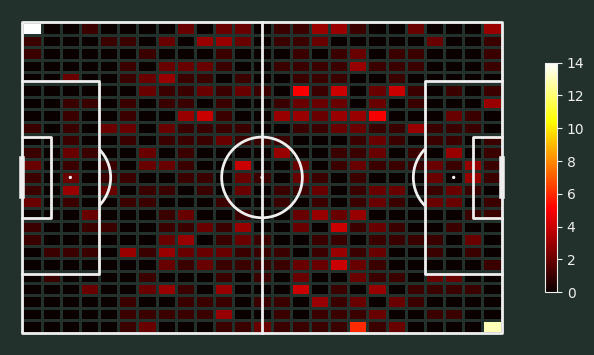

In [34]:
# setup pitch
pitch = Pitch(pitch_type='wyscout', line_zorder=2,
              pitch_color='#22312b', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(arsenal_pass.pos_orig_x, arsenal_pass.pos_orig_y, statistic='count', bins=(25, 25))
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

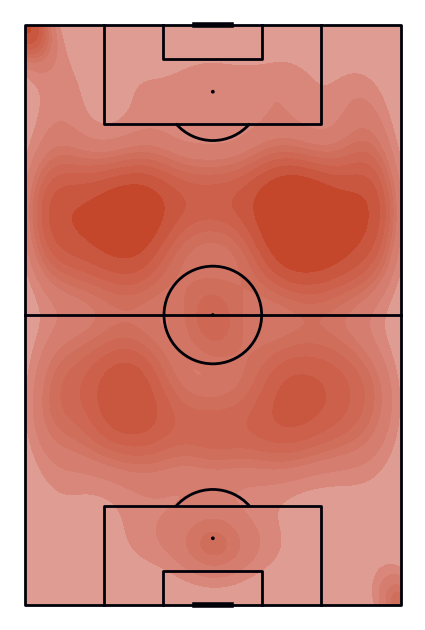

In [29]:
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                  ['#e3aca7', '#c03a1d'], N=100)

pitch = VerticalPitch(pitch_type='opta', line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(arsenal_pass.pos_orig_x, arsenal_pass.pos_orig_y, ax=ax,
                    # fill using 100 levels so it looks smooth
                    fill=True,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    thresh=0,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=flamingo_cmap)

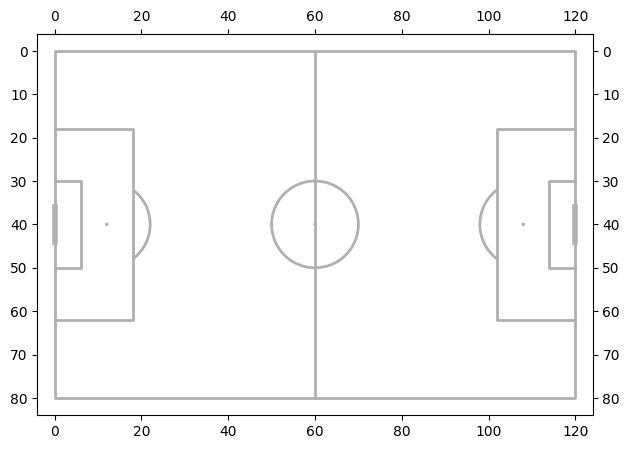

In [27]:
pitch = Pitch(axis=True, label=True, tick=True)
fig, ax = pitch.draw()

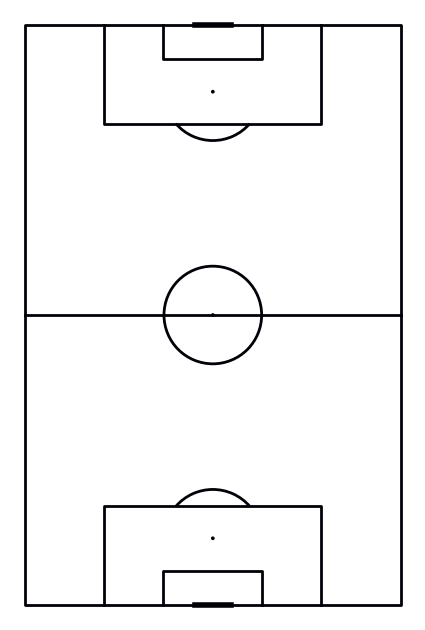

In [30]:
pitch = VerticalPitch(pitch_type='opta', line_color='#000009', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.4, 6.4))
kde = pitch.kdeplot(99, 99, ax=ax,
                    # fill using 100 levels so it looks smooth
                    fill=True,
                    # shade the lowest area so it looks smooth
                    # so even if there are no events it gets some color
                    thresh=0,
                    cut=4,  # extended the cut so it reaches the bottom edge
                    cmap=flamingo_cmap)